In [5]:
library('igraph')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



## Q18

In [12]:
circle_files <- list.files(path = "gplus", pattern = "*.circles")
over_2_circle_count <- 0
for (f in circle_files){
  f <- paste("gplus/", f, sep = "")
  if (length(readLines(f)) > 2){
    over_2_circle_count <- over_2_circle_count + 1
  }
}
print(paste("Total number of personalized network:", length(circle_files)))
print(paste("Total number of personalized network of more than 2 circles:", over_2_circle_count))

[1] "Total number of personalized network: 132"
[1] "Total number of personalized network of more than 2 circles: 57"


## Q19

In [3]:
node_1 <- "109327480479767108490"
node_2 <- "115625564993990145546"
node_3 <- "101373961279443806744"
nodes_vector <- c(node_1, node_2, node_3)

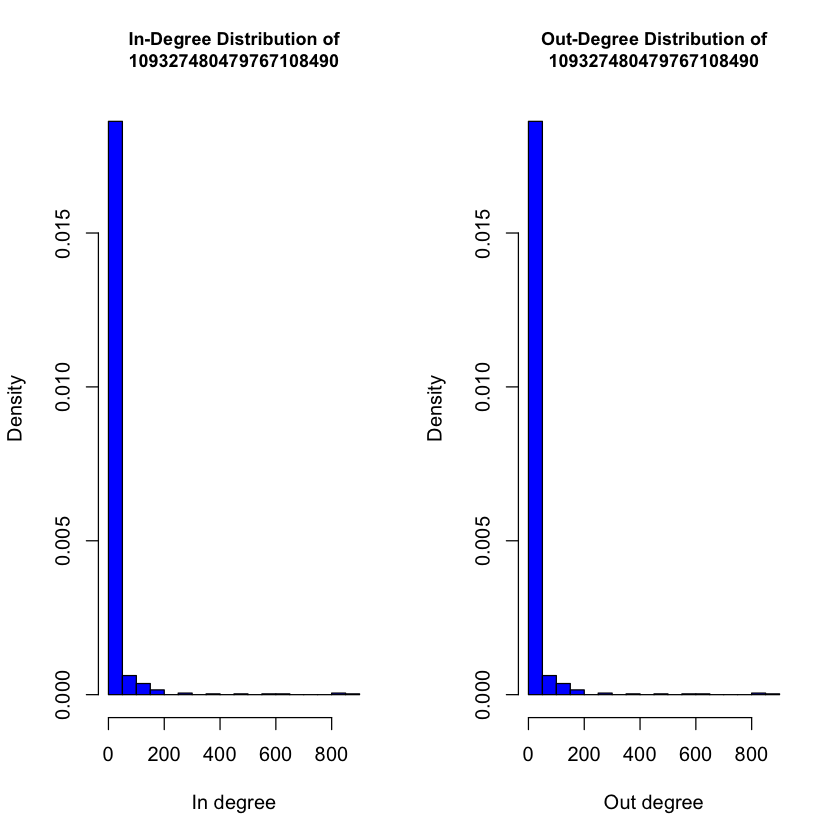

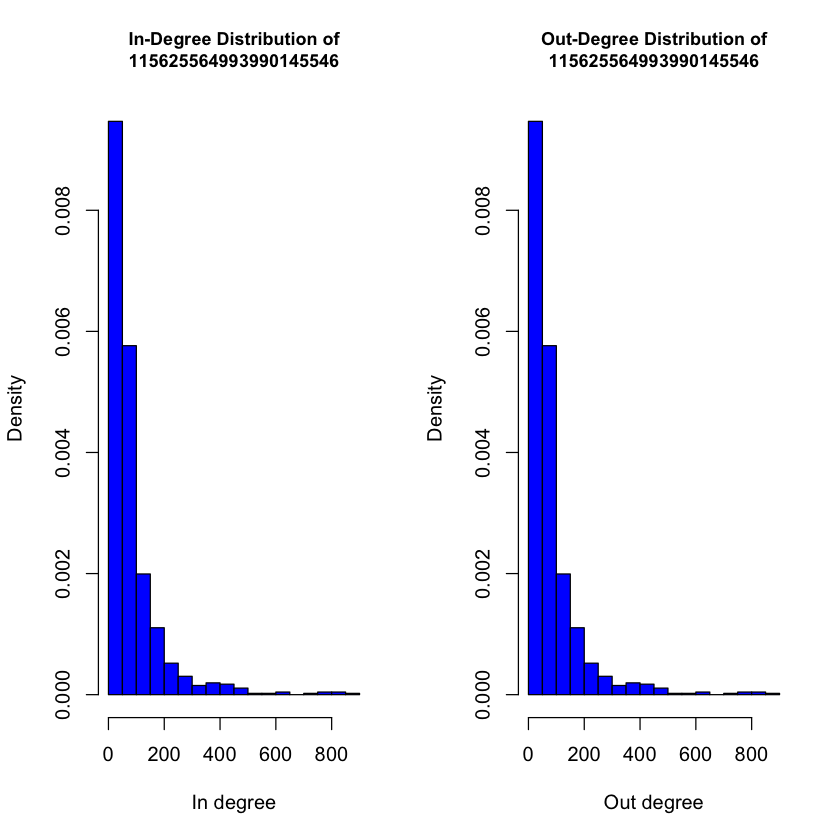

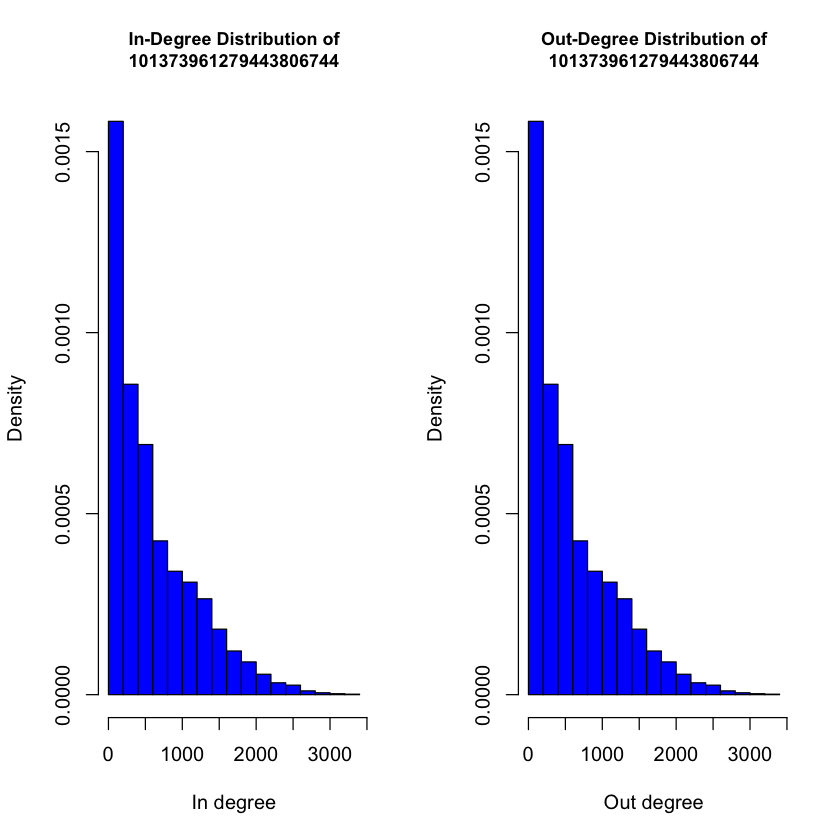

In [42]:
for (node in nodes_vector){
    f <- paste("gplus/", node, ".edges", sep = "")
    g <- read_graph(f, format = "ncol")
    in_deg <- degree(g, mode = "in")
    out_deg <- degree(g, mode = "out")
    par(mfrow = c(1,2))
    hist(in_deg, breaks = 20, col = "blue", freq = FALSE, 
         main = paste('In-Degree Distribution of\n', node, sep = ""), cex.main = 0.9,
         xlab = "In degree", ylab = "Density")
    hist(out_deg, breaks = 20, col = "blue", freq = FALSE, 
         main = paste('Out-Degree Distribution of\n', node, sep = ""),  cex.main = 0.9,
         xlab = "Out degree", ylab = "Density")     
}

## Q20

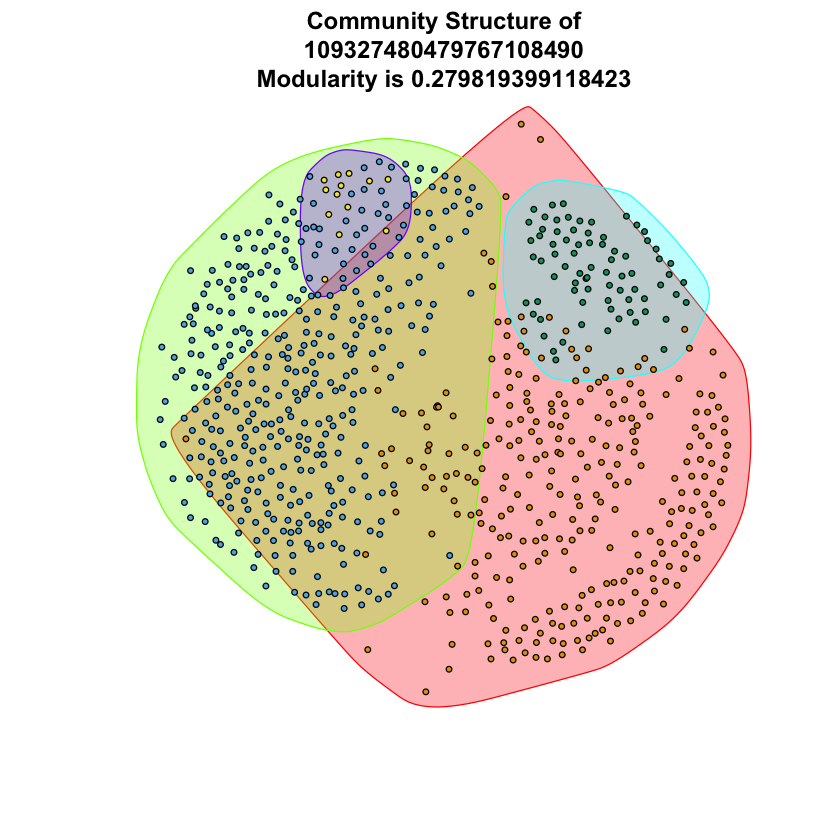

In [97]:
f <- paste("gplus/", node_1, ".edges", sep = "")
g <- read_graph(f, format = "ncol")
communities <- cluster_walktrap(g, modularity = TRUE)
plot(communities, g, vertex.label = NA, vertex.size = 2, edge.lty = 0,
         main = paste("Community Structure of\n", node_1,
                      "\nModularity is ", modularity(communities), sep = ""))

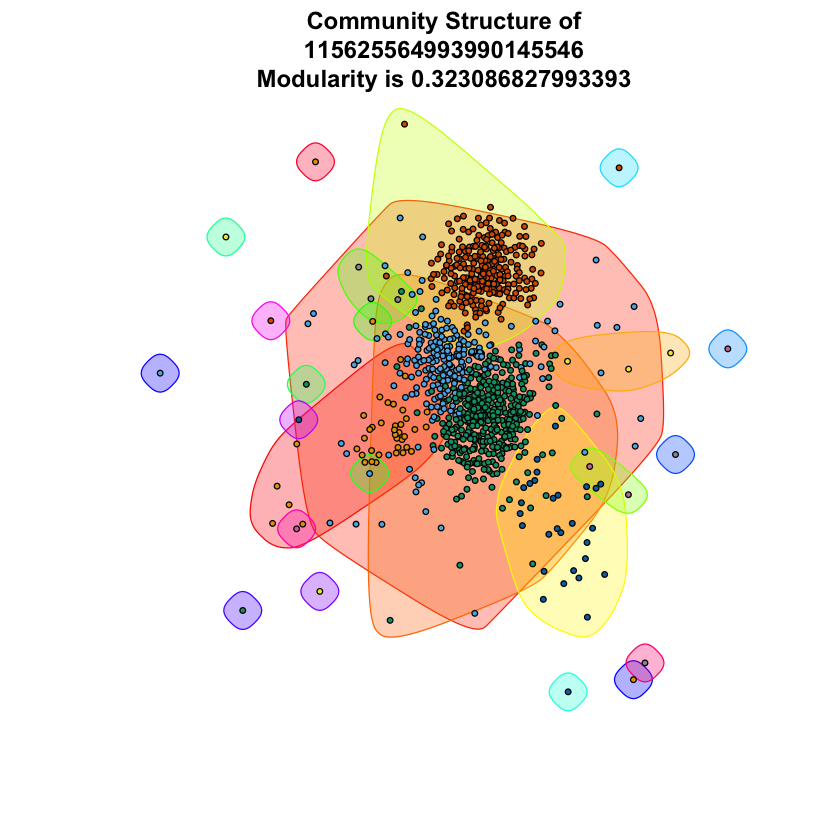

In [98]:
f <- paste("gplus/", node_2, ".edges", sep = "")
g <- read_graph(f, format = "ncol")
communities <- cluster_walktrap(g, modularity = TRUE)
plot(communities, g, vertex.label = NA, vertex.size = 2, edge.lty = 0,
         main = paste("Community Structure of\n", node_2,
                      "\nModularity is ", modularity(communities), sep = ""))

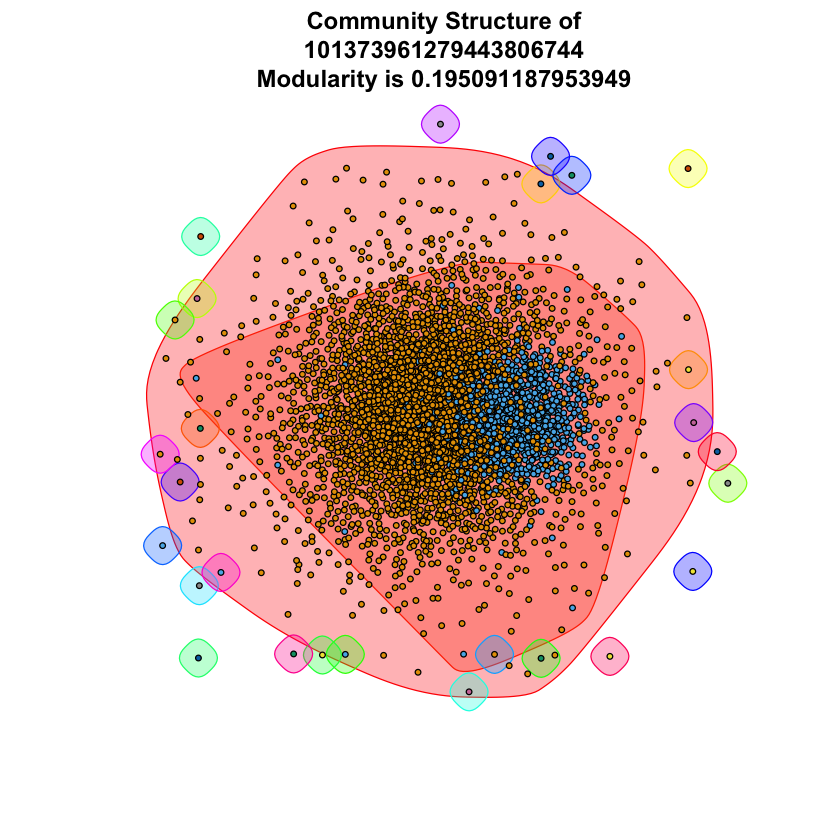

In [294]:
f <- paste("gplus/", node_3, ".edges", sep = "")
g <- read_graph(f, format = "ncol")
communities <- cluster_walktrap(g, modularity = TRUE)
plot(communities, g, vertex.label = NA, vertex.size = 2, edge.lty = 0,
         main = paste("Community Structure of\n", node_3,
                      "\nModularity is ", modularity(communities), sep = ""))

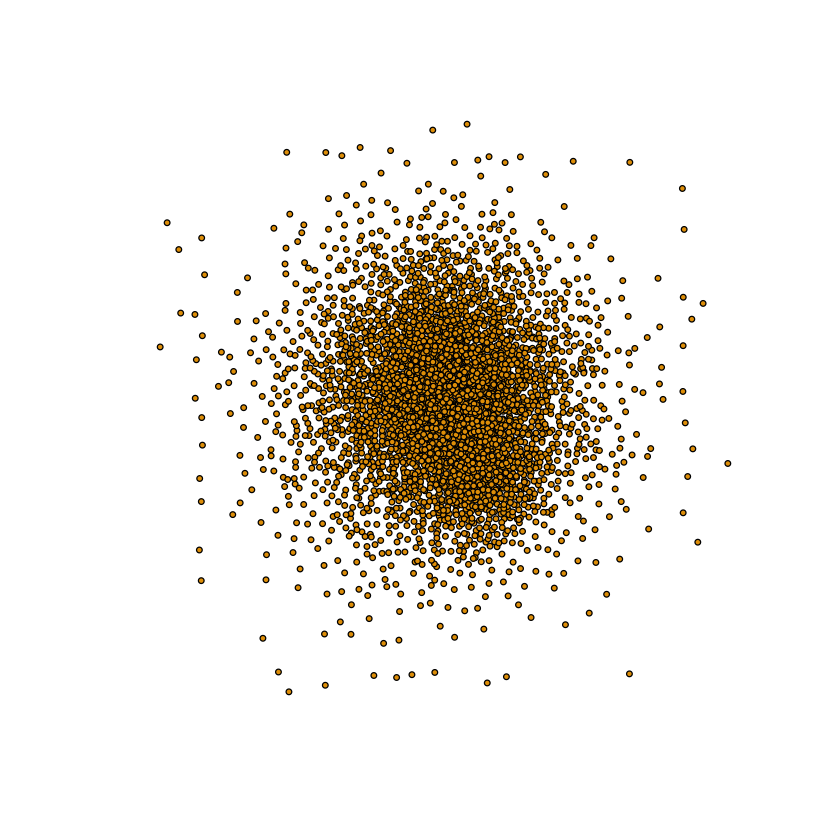

In [293]:
f <- paste("gplus/", node_3, ".edges", sep = "")
g <- read_graph(f, format = "ncol")
plot(g, vertex.label = NA, vertex.size = 2, edge.lty = 0)

## Q21

## Q22

### node_1

In [232]:
# Calculate the number of nodes in each circle, vector a
f <- paste("gplus/", node_1, ".circles", sep = "")
circles <- readLines(f)

circle_nodes <- c()
circle_node_count_vector <- rep(0,length(circles))
nodes_in_circles <- c()

for (i in c(1:length(circles))) {
    circle_nodes <- unlist(strsplit(circles[i], "\t"))
    circle_nodes <- circle_nodes[-1] # remove the header
    circle_node_count_vector[i] <- length(circle_nodes)
    
    # this loop records all the nodes with circle information in nodes_in_circles vector, preparation for N 
    for (j in c(1:length(circle_nodes))) { 
        if (circle_nodes[j] %in% nodes_in_circles == FALSE) {
            nodes_in_circles <- c(nodes_in_circles, circle_nodes[j])
        }
    }         
}

a <- circle_node_count_vector

In [233]:
a

[1] 330 346 419

In [234]:
# all the nodes with circle information, N
N <- length(nodes_in_circles)

In [235]:
N

[1] 764

In [236]:
# Calculate the number of nodes in each community, vector b
f <- paste("gplus/", node_1, ".edges", sep = "")
g <- read_graph(f, format = "ncol")
communities <- cluster_walktrap(g, modularity = TRUE)

# loop all the nodes in the graph and to detect each node belongs to which community
# nodes in V(g) and nodes in membership(communities) have the same indeces
b <- rep(0,length(communities))

for (i in c(1:length(V(g)))) {
    node_id <- V(g)[i]$name
    # if this node is with circle information
    if (node_id %in% nodes_in_circles) {
        community_index <- membership(communities)[[i]] # detect which community does node i belong to
        b[community_index] <- b[community_index] + 1 # add count to the community count b vector
    }
}

In [237]:
b

[1] 283 393  75  13

In [238]:
# calculate the Aji, matrix Aji
A_matrix <- matrix(1:(length(circles)*length(communities)), nrow = length(communities))



for (j in c(1:length(communities))) {    
    
    # extract nodes in community j
    community_nodes <- c()
    for (k in c(1:length(V(g)))) {
        # detect which community does node k belong to             
        community_index <- membership(communities)[[k]]

        # if node k belongs to community j, then put its ID to the community_nodes vector
        if (community_index == j) {
            node_id <- V(g)[k]$name
            community_nodes <- c(community_nodes, node_id)
        }
    }
    

    for (i in c(1:length(circles))) {        
        # extract nodes in circle i        
        circle_nodes <- unlist(strsplit(circles[i], "\t"))
        circle_nodes <- circle_nodes[-1] # remove the header      
         
        # find Aji
        A_matrix[j, i] <- length(intersect(community_nodes, circle_nodes))
    }
        
}

In [239]:
A_matrix

253,269,15
2,2,391
75,75,0
0,0,13


In [240]:
H_C <- -sum(a/N*log(a/N))
H_C

[1] 1.050779

In [241]:
H_K <- -sum(b/N*log(b/N))
H_K

[1] 1.006991

In [242]:
H_CK <- 0
for (j in c(1:length(communities))) {
    for (i in c(1:length(circles))) {
        if (A_matrix[j, i] == 0) next
        H_CK <- H_CK - A_matrix[j, i]/N*log(A_matrix[j, i]/b[j]) 
    }
}
H_CK

[1] 0.1429017

In [243]:
H_KC <- 0
for (i in c(1:length(circles))) {
    for (j in c(1:length(communities))) {
        if (A_matrix[j, i] == 0) next
        H_KC <- H_KC - A_matrix[j, i]/N*log(A_matrix[j, i]/a[i])        
    }
}
H_KC

[1] 0.658882

In [244]:
h <- 1 - H_CK/H_C
h

[1] 0.8640041

In [245]:
c <- 1 - H_KC/H_K
c

[1] 0.3456923

### node_2

In [260]:
# Calculate the number of nodes in each circle, vector a
f <- paste("gplus/", node_2, ".circles", sep = "")
circles <- readLines(f)

circle_nodes <- c()
circle_node_count_vector <- rep(0,length(circles))
nodes_in_circles <- c()

for (i in c(1:length(circles))) {
    circle_nodes <- unlist(strsplit(circles[i], "\t"))
    circle_nodes <- circle_nodes[-1] # remove the header
    circle_node_count_vector[i] <- length(circle_nodes)
    
    # this loop records all the nodes with circle information in nodes_in_circles vector, preparation for N 
    for (j in c(1:length(circle_nodes))) { 
        if (circle_nodes[j] %in% nodes_in_circles == FALSE) {
            nodes_in_circles <- c(nodes_in_circles, circle_nodes[j])
        }
    }         
}

a <- circle_node_count_vector

In [261]:
a

[1]   6   9 169 276 325  93  73 338  46  62 338 255 485   7 260 363 188 327 314
[20]  48 489 276  79 373  67  10 354  73 300 362 102

In [263]:
# all the nodes with circle information, N
N <- length(nodes_in_circles)

In [264]:
N

[1] 727

In [265]:
# Calculate the number of nodes in each community, vector b
f <- paste("gplus/", node_2, ".edges", sep = "")
g <- read_graph(f, format = "ncol")
communities <- cluster_walktrap(g, modularity = TRUE)

# loop all the nodes in the graph and to detect each node belongs to which community
# nodes in V(g) and nodes in membership(communities) have the same indeces
b <- rep(0,length(communities))

for (i in c(1:length(V(g)))) {
    node_id <- V(g)[i]$name
    # if this node is with circle information
    if (node_id %in% nodes_in_circles) {
        community_index <- membership(communities)[[i]] # detect which community does node i belong to
        b[community_index] <- b[community_index] + 1 # add count to the community count b vector
    }
}

In [266]:
b

[1]   3 134 357   0   0 232   0   1   0   0   0   0   0   0   0   0   0   0   0
[20]   0   0   0   0   0   0

In [267]:
# calculate the Aji, matrix Aji
A_matrix <- matrix(1:(length(circles)*length(communities)), nrow = length(communities))



for (j in c(1:length(communities))) {    
    
    # extract nodes in community j
    community_nodes <- c()
    for (k in c(1:length(V(g)))) {
        # detect which community does node k belong to             
        community_index <- membership(communities)[[k]]

        # if node k belongs to community j, then put its ID to the community_nodes vector
        if (community_index == j) {
            node_id <- V(g)[k]$name
            community_nodes <- c(community_nodes, node_id)
        }
    }
    

    for (i in c(1:length(circles))) {        
        # extract nodes in circle i        
        circle_nodes <- unlist(strsplit(circles[i], "\t"))
        circle_nodes <- circle_nodes[-1] # remove the header      
         
        # find Aji
        A_matrix[j, i] <- length(intersect(community_nodes, circle_nodes))
    }
        
}

In [268]:
A_matrix

0,0,2,2,0,2,0,0,0,0,⋯,0,1,1,1,0,0,1,0,0,2
2,3,22,24,28,9,56,76,28,53,⋯,24,24,43,21,3,34,4,24,37,32
4,6,145,250,297,82,17,32,17,9,⋯,252,52,328,43,7,319,68,276,324,65
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,230,1,0,⋯,0,2,1,2,0,1,0,0,1,3
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [269]:
H_C <- -sum(a/N*log(a/N), na.rm = TRUE)
H_C

[1] 8.465147

In [270]:
H_K <- -sum(b/N*log(b/N), na.rm = TRUE)
H_K

[1] 1.057151

In [271]:
H_CK <- 0
for (j in c(1:length(communities))) {
    for (i in c(1:length(circles))) {
        if (A_matrix[j, i] == 0) next
        H_CK <- H_CK - A_matrix[j, i]/N*log(A_matrix[j, i]/b[j]) 
    }
}
H_CK

[1] 4.715556

In [275]:
H_KC <- 0
for (i in c(1:length(circles))) {
    for (j in c(1:length(communities))) {
        if (A_matrix[j, i] == 0) next
        H_KC <- H_KC - A_matrix[j, i]/N*log(A_matrix[j, i]/a[i])
    }
}
H_KC

[1] 4.625792

In [276]:
h <- 1 - H_CK/H_C
h

[1] 0.4429445

In [277]:
c <- 1 - H_KC/H_K
c

[1] -3.375718

### node_3

In [279]:
# Calculate the number of nodes in each circle, vector a
f <- paste("gplus/", node_3, ".circles", sep = "")
circles <- readLines(f)

circle_nodes <- c()
circle_node_count_vector <- rep(0,length(circles))
nodes_in_circles <- c()

for (i in c(1:length(circles))) {
    circle_nodes <- unlist(strsplit(circles[i], "\t"))
    circle_nodes <- circle_nodes[-1] # remove the header
    circle_node_count_vector[i] <- length(circle_nodes)
    
    # this loop records all the nodes with circle information in nodes_in_circles vector, preparation for N 
    for (j in c(1:length(circle_nodes))) { 
        if (circle_nodes[j] %in% nodes_in_circles == FALSE) {
            nodes_in_circles <- c(nodes_in_circles, circle_nodes[j])
        }
    }         
}

a <- circle_node_count_vector

In [280]:
a

[1] 471 445 430

In [281]:
# all the nodes with circle information, N
N <- length(nodes_in_circles)

In [282]:
N

[1] 521

In [283]:
# Calculate the number of nodes in each community, vector b
f <- paste("gplus/", node_2, ".edges", sep = "")
g <- read_graph(f, format = "ncol")
communities <- cluster_walktrap(g, modularity = TRUE)

# loop all the nodes in the graph and to detect each node belongs to which community
# nodes in V(g) and nodes in membership(communities) have the same indeces
b <- rep(0,length(communities))

for (i in c(1:length(V(g)))) {
    node_id <- V(g)[i]$name
    # if this node is with circle information
    if (node_id %in% nodes_in_circles) {
        community_index <- membership(communities)[[i]] # detect which community does node i belong to
        b[community_index] <- b[community_index] + 1 # add count to the community count b vector
    }
}

In [284]:
b

[1] 0 2 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [285]:
# calculate the Aji, matrix Aji
A_matrix <- matrix(1:(length(circles)*length(communities)), nrow = length(communities))



for (j in c(1:length(communities))) {    
    
    # extract nodes in community j
    community_nodes <- c()
    for (k in c(1:length(V(g)))) {
        # detect which community does node k belong to             
        community_index <- membership(communities)[[k]]

        # if node k belongs to community j, then put its ID to the community_nodes vector
        if (community_index == j) {
            node_id <- V(g)[k]$name
            community_nodes <- c(community_nodes, node_id)
        }
    }
    

    for (i in c(1:length(circles))) {        
        # extract nodes in circle i        
        circle_nodes <- unlist(strsplit(circles[i], "\t"))
        circle_nodes <- circle_nodes[-1] # remove the header      
         
        # find Aji
        A_matrix[j, i] <- length(intersect(community_nodes, circle_nodes))
    }
        
}

In [286]:
A_matrix

0,0,0
2,1,2
5,5,4
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0


In [287]:
H_C <- -sum(a/N*log(a/N), na.rm = TRUE)
H_C

[1] 0.38432

In [288]:
H_K <- -sum(b/N*log(b/N), na.rm = TRUE)
H_K

[1] 0.06594389

In [289]:
H_CK <- 0
for (j in c(1:length(communities))) {
    for (i in c(1:length(circles))) {
        if (A_matrix[j, i] == 0) next
        H_CK <- H_CK - A_matrix[j, i]/N*log(A_matrix[j, i]/b[j]) 
    }
}
H_CK

[1] 0.003043611

In [290]:
H_KC <- 0
for (i in c(1:length(circles))) {
    for (j in c(1:length(communities))) {
        if (A_matrix[j, i] == 0) next
        H_KC <- H_KC - A_matrix[j, i]/N*log(A_matrix[j, i]/a[i])
    }
}
H_KC

[1] 0.1758983

In [291]:
h <- 1 - H_CK/H_C
h

[1] 0.9920805

In [292]:
c <- 1 - H_KC/H_K
c

[1] -1.667394